In [123]:
import cv2
import matplotlib.pyplot as plt

% matplotlib inline

rgb = cv2.cvtColor(cv2.imread('spiral.jpg'), cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
# plt.imshow(rgb)

my_hsv = rgb_to_hsv(arr)

my_rgb = rgb
my_rgb2 = hsv_to_rgb(my_hsv)

my_rgb3 = cv2.cvtColor(my_hsv, cv2.COLOR_HSV2RGB)

# hsv[0,...] = hsv[0,...]
# hsv[0,...] = hsv[0,...] / 255.0
# hsv[0,...] = hsv[0,...] / 255.0

foo = hsv - my_hsv
hsv[0,0,0]

108

In [91]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import urllib

%matplotlib inline

In [92]:
image = 'http://previews.123rf.com/images/wayoutwest/wayoutwest0711/wayoutwest071100013/2018406-Hypnotic-color-swirl-background--Stock-Photo-rainbow-spiral-abstract.jpg'
pil_im = Image.open(urllib.urlopen(image))
arr = np.asarray(pil_im)

## rgb_to_hsv and hsv_to_rgb implementations

In [116]:
def rgb_to_hsv(arr):
    
    arr = np.array(arr.astype(np.float32))
    
    # need to scale [0, 255] to [0, 1]
    if np.any(arr > 1.0):
        arr /= 255.0
    
    r = arr[..., 0]
    g = arr[..., 1]
    b = arr[..., 2]
    
    hsv = np.zeros_like(arr)
    
    # element-wise max and min against the channel dimension (HWC layout) 
    maxes = arr.max(-1)
    mins = arr.min(-1)
    
    # chroma
    c = maxes - mins
        
    # to prevent division by zero
    c_nonzero = c > 0.0
    max_nonzero = maxes > 0.0
    
    # hue calculation
    # red channel
    idx = (maxes == r) & c_nonzero
    hsv[idx, 0] = ((g[idx] - b[idx]) / c[idx]) % 6.0
    
    # green channel
    idx = (maxes == g) & c_nonzero
    hsv[idx, 0] = (b[idx] - r[idx]) / c[idx] + 2.0
    
    # blue channel
    idx = (maxes == b) & c_nonzero
    hsv[idx, 0] = (r[idx] - g[idx]) / c[idx] + 4.0
        
    hsv[..., 0] = hsv[..., 0] * 60 # 6.0

    # saturation
    hsv[max_nonzero, 1] = c[max_nonzero] / maxes[max_nonzero]
    
    # value
    hsv[..., 2] = maxes 
    
    return hsv                  

In [94]:
def hsv_to_rgb(arr):
        
    h = arr[..., 0]
    s = arr[..., 1]
    v = arr[..., 2]
    
    rgb_arr = np.zeros_like(arr)
    
    chroma = v * s
    
    h_prime = h * 6.0
        
    x = chroma * ( 1 - np.abs(h_prime % 2 - 1))  
    m = v - chroma
        
    rgb_arr[..., 0] = chroma * (
        np.logical_and(h_prime >= 0, h_prime < 1) + 
        np.logical_and(h_prime >= 5, h_prime < 6)
    ) + x * (
        np.logical_and(h_prime >= 1, h_prime < 2) +  
        np.logical_and(h_prime >= 4, h_prime < 5)       
    )
    
    rgb_arr[..., 1] = chroma * (
        np.logical_and(h_prime >= 1, h_prime < 3)
    ) + x * (
        np.logical_and(h_prime >= 0, h_prime < 1) +  
        np.logical_and(h_prime >= 3, h_prime < 4)       
    )
    
    rgb_arr[..., 2] = chroma * (
        np.logical_and(h_prime >= 3, h_prime < 5)
    ) + x * (
        np.logical_and(h_prime >= 2, h_prime < 3) +  
        np.logical_and(h_prime >= 5, h_prime < 6)        
    )    
    
    for i in xrange(3):
        rgb_arr[..., i] += m
    
    rgb_arr = np.round(rgb_arr * 255.0).astype(np.uint8)
    rgb_arr = np.minimum(rgb_arr, 255)
    
    return rgb_arr

## validate results

In [95]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* show input up to this size without scrolling */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

channel 0, max. abs. difference from original: 0 / 255
channel 1, max. abs. difference from original: 0 / 255
channel 2, max. abs. difference from original: 0 / 255


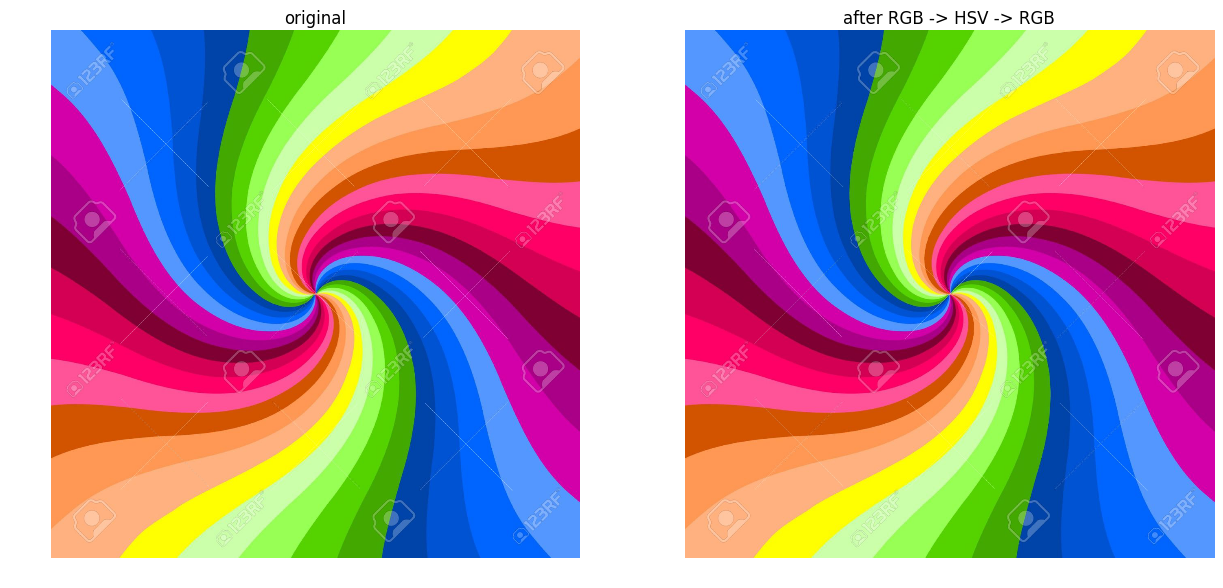

In [96]:
my_rgb = hsv_to_rgb(rgb_to_hsv(arr))

# show that the difference between original and transformed are very small
for i in xrange(3):
    print("channel %d, max. abs. difference from original: %d / 255" % (i, np.amax(arr[..., i] - my_rgb[..., i])))

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 15)

plt.subplot(2, 2, 1)
imshow(arr)
plt.axis('off')
plt.title('original')

plt.subplot(2, 2, 2)
imshow(arr)
plt.axis('off')
plt.title('after RGB -> HSV -> RGB')